# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [8]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

2. Perform dimensionality reduction using PCA `(10 pts)`

In [9]:
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_scaled)

3. Get the total explained variance `(5 pts)`

In [12]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

print("Total explained variance:", explained_variance.sum())

Explained variance of PC1 0.44272025607526366
Explained variance of PC2 0.18971182044033078
Total explained variance: 0.6324320765155944


4. Plot the explained variances of each principal component `(5 pts)`

Text(0, 0.5, 'Explained Variance')

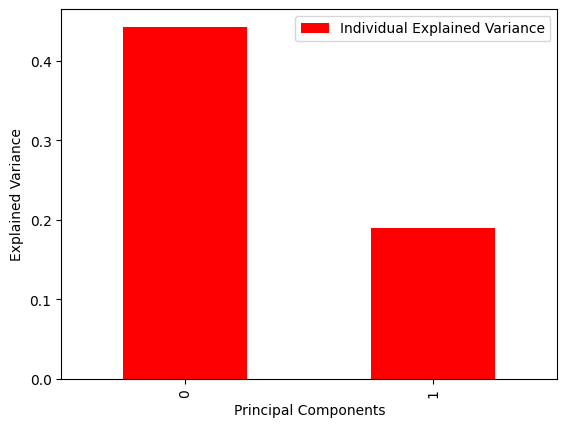

In [14]:
pd.DataFrame(explained_variance).plot.bar(color='red')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

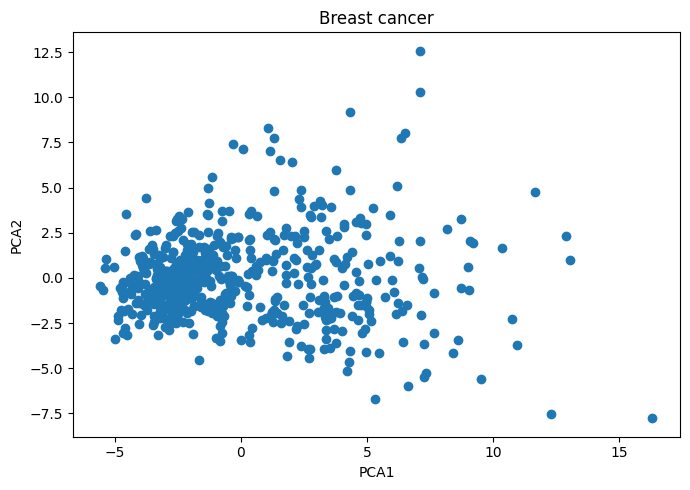

In [18]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Breast cancer')
plt.tight_layout()

6. Perform clustering using any clustering algorithm `(10 pts)`

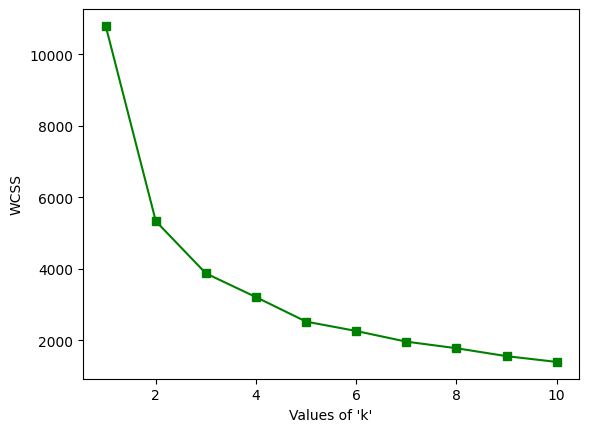

In [19]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=2)

# Use X_reduced for clustering
kmeans.fit(X_reduced)

KMeans(n_clusters=2)

In [44]:
centroids = kmeans.cluster_centers_

In [43]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

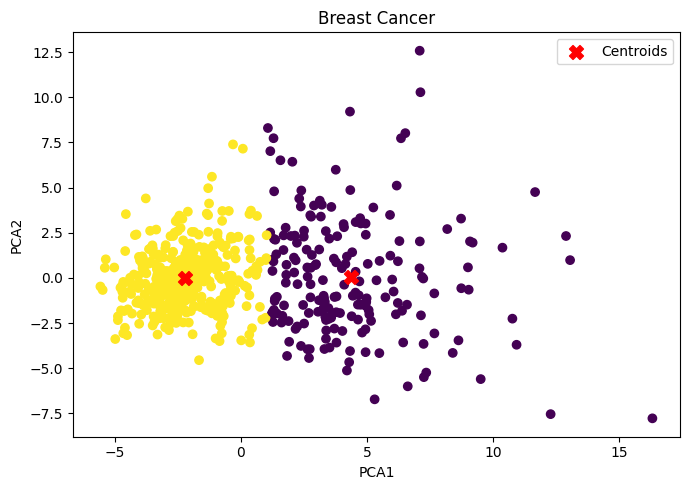

In [48]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)
plt.scatter(centroids[:,0],centroids[:,1],marker='X',s=100,c='red', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Breast Cancer')
plt.tight_layout()

7. View the loading scores of each principal component `(5 pts)`

In [46]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns.drop('target'))
loading_matrix




,PC1,PC2
mean radius,0.798469,-0.558394
mean texture,0.378346,-0.142564
mean perimeter,0.829965,-0.513800
mean area,0.806101,-0.551755
mean smoothness,0.520110,0.444392
mean compactness,0.872817,0.362680
mean concavity,0.942542,0.143660
mean concave points,0.951490,-0.083016
mean symmetry,0.503978,0.454506
mean fractal dimension,0.234772,0.875292


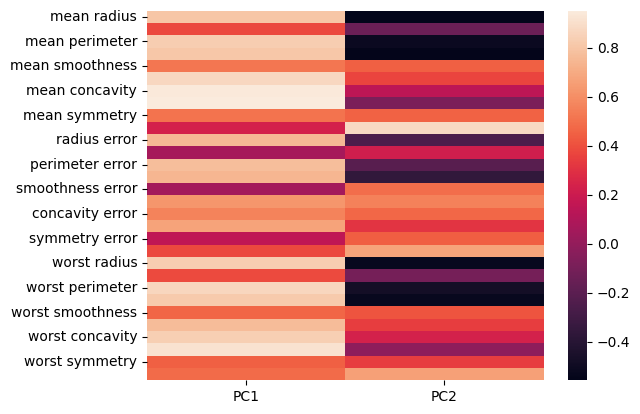

In [47]:
# Heat map
sns.heatmap(loading_matrix)
plt.show()